In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

In [3]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1,
                  train_size=0.8,
                  test_size=0.2,
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
import time

In [6]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')

In [7]:
clf.C = 1

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

4.9953460693359375 [ms]


0.9649122807017544

In [8]:
clf.C = 1e20

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

380.856990814209 [ms]


0.956140350877193

In [9]:
from sklearn.model_selection import GridSearchCV

param = {'C': 10 ** np.arange(-15.0, 21.0)}

gs = GridSearchCV(clf, param, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    2.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1e+20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

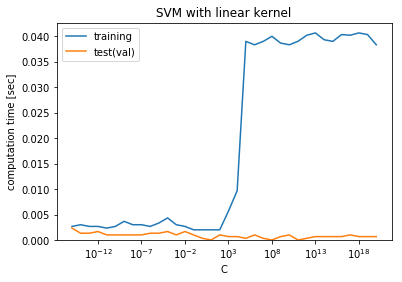

In [10]:
plt.plot(gs.cv_results_['param_C'].data,
         gs.cv_results_['mean_fit_time'],
         label="training")

plt.plot(gs.cv_results_['param_C'].data,
         gs.cv_results_['mean_score_time'],
         label="test(val)")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best");
plt.title("SVM with linear kernel");

In [11]:
from sklearn.svm import LinearSVC

clf = LinearSVC()

In [12]:
clf.C = 1e20

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

8.991479873657227 [ms]


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9736842105263158

In [13]:
from sklearn.model_selection import GridSearchCV

param = {'C': 10 ** np.arange(-15.0, 21.0)}

gs2 = GridSearchCV(clf,param, verbose=1)
gs2.fit(X_train, y_train)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LinearSVC(C=1e+20, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

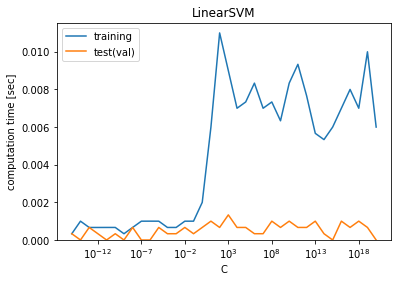

In [14]:
plt.plot(gs2.cv_results_['param_C'].data,
         gs2.cv_results_['mean_fit_time'],
         label="training")

plt.plot(gs2.cv_results_['param_C'].data,
         gs2.cv_results_['mean_score_time'],
         label="test(val)")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best");
plt.title("LinearSVM");

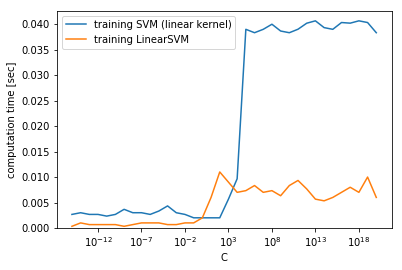

In [15]:
plt.plot(gs.cv_results_['param_C'].data,
         gs.cv_results_['mean_fit_time'],
         label="training SVM (linear kernel)")

plt.plot(gs2.cv_results_['param_C'].data,
         gs2.cv_results_['mean_fit_time'],
         label="training LinearSVM")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best");

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

estimators = [('scaler', MinMaxScaler()),
              ('clf', LinearSVC())]

pipe = Pipeline(estimators)

In [17]:
from sklearn.model_selection import GridSearchCV

param = {'clf__C': 100 ** np.arange(-15.0, 21.0)}

gs = GridSearchCV(pipe, param, verbose=1)
gs.fit(X_train, y_train)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__C': array([1.e-30, 1.e-28, 1.e-26, 1.e-24, 1.e-22, 1.e-20, 1.e-18, 1.e-16,
       1.e-14, 1.e-12, 1.e-10, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00,
       1.e+02, 1.e+04, 1.e+06, 1.e+08, 1.e+10, 1.e+12, 1.e+14, 1.e+16,
       1.e+18, 1.e+20, 1.e+22, 1.e+24, 1.e+26, 1.e+28, 1.e+30, 1.e+32,
       1.e+34, 1.e+36, 1.e+38, 1.e+40])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Text(0.5, 1.0, 'LinearSVM')

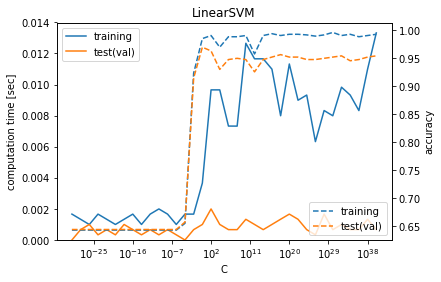

In [18]:
plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_fit_time'],
         label="training")

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_score_time'],
         label="test(val)")

plt.ylabel("computation time [sec]")
plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.legend(loc="upper left");

plt.twinx()

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_train_score'],
         linestyle="--",
         label="training")

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_test_score'],
         linestyle='--',
         label="test(val)")

plt.ylabel("accuracy")
plt.legend(loc="lower right");

plt.title("LinearSVM")

In [19]:
from sklearn.preprocessing import MaxAbsScaler

estimators = [('scaler', MinMaxScaler()),
              ('clf', SVC(kernel='linear'))]

pipe = Pipeline(estimators)

In [20]:
from sklearn.model_selection import GridSearchCV

param = {'clf__C':10 ** np.arange(-15.0, 21.0)}

gs = GridSearchCV(pipe, param, verbose=1)
gs.fit(X_train, y_train)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    2.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__C': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


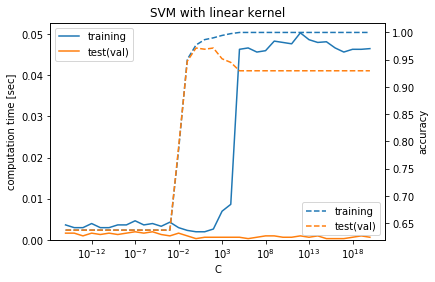

In [21]:
plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_fit_time'],
         label="training")

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_score_time'],
         label="test(val)")

plt.ylabel("computation time [sec]")
plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.legend(loc="upper left");

plt.twinx()

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_train_score'],
         linestyle="--",
         label="training")

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_test_score'],
         linestyle="--",
         label="test(val)")
plt.ylabel("accuracy")
plt.legend(loc="lower right");

plt.title("SVM with linear kernel");

In [28]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

X_train, X_test = mnist.data[:60000]/255., mnist.data[60000:]/255.
y_train, y_test = mnist.target[:60000], mnist.target[60000:]

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [30]:
clf = SVC(kernel='linear')

In [31]:
st = time.time()
clf.fit(X_train[::100], y_train[::100])
print(1000 * (time.time() - st), "[ms]")

194.81706619262695 [ms]


In [32]:
for thin in [100, 50, 10, 5, 4]: # > 1 min...
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() - st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, 
                                                       y_train[::thin].size,
                                                       score))

0.19 sec, size 600, accuracy 0.89
0.47 sec, size 1200, accuracy 0.9
5.81 sec, size 6000, accuracy 0.905
18.08 sec, size 12000, accuracy 0.917
25.60 sec, size 15000, accuracy 0.9164


In [33]:
clf = LinearSVC()

In [35]:
for thin in [100, 50, 10, 5, 4]:
    
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() -st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et,
                                                       y_train[::thin].size,
                                                       score))

0.16 sec, size 600, accuracy 0.91


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.47 sec, size 1200, accuracy 0.865


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3.59 sec, size 6000, accuracy 0.865


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


10.66 sec, size 12000, accuracy 0.894
15.66 sec, size 15000, accuracy 0.8948


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
clf = LinearSVC(dual=False)

In [37]:
for thin in [100, 50, 10, 5, 4]:
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() - st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et,
                                                       y_train[::thin].size,
                                                       score))

0.18 sec, size 600, accuracy 0.91
0.34 sec, size 1200, accuracy 0.87
1.73 sec, size 6000, accuracy 0.866
4.93 sec, size 12000, accuracy 0.894
5.99 sec, size 15000, accuracy 0.8956


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


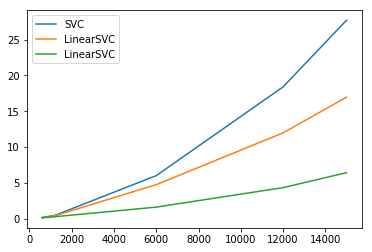

In [39]:
for clf in [SVC(kernel='linear'),
            LinearSVC(),
            LinearSVC(dual=False)]:
    
    times = []
    sizes = []
    
    for thin in [100, 50 ,10, 5, 4]:
        
        st = time.time()
        clf.fit(X_train[::thin], y_train[::thin])
        times.append(time.time() - st)
        sizes.append(y_train[::thin].size)
    
    plt.plot(sizes, times, label=clf.__class__.__name__)
    
plt.legend(loc="best")
plt.show()

In [41]:
estimators = [('scaler', MinMaxScaler()),
              ('clf', LinearSVC(dual=False))]

pipe = Pipeline(estimators)

param = {'clf__C' : 10 ** np.arange(-5.0, 10.0)}

gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 28.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [ ]:
# estimators = [('scaler', MinMaxScaler()), 
#               ('clf', LinearSVC(dual=True))]

# pipe = Pipeline(estimators)

# param = {'clf__C': 10**np.arange(-5.0,10.0)}

# gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=2)
# gs.fit(X_train, y_train)

In [ ]:
# estimators = [('scaler', MinMaxScaler()), 
#               ('clf', SVC(kernel='linear'))]

# pipe = Pipeline(estimators)

# param = {'clf__C': 10**np.arange(-5.0,10.0)}

# gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=2)
# gs.fit(X_train, y_train)